# 안녕하세요 투빅스 보충 과제입니다 :)

안녕하세요 투빅스 12기 김태한입니다 :)

이번 과제는 코로나 바이러스로 예상치 못한 휴식시간이 생겨 여러분의 딥러닝 감을 유지하고자 드리게 되었습니다.  

투빅이분들이라면 분명 쉽게 해낼거라 믿습니다!!


모르시는 거 있으시면 저 그리고 12기 멘토분들을 많이 많이 괴롭혀주세요!!!

# Assignment 1

여러분들은 저번 과제로 뉴럴넷 구현을 이미 한번 하셨습니다!  

사실 이번 과제의 최종 목적도 뉴럴넷 구현인데요 이미 한번 하셨고 실력들이 워낙 출중하셔서 금방금방 하실수 있으실거에요.  

구현에 바로 들어가기에 앞서 전체 네트워크 구조와 각 구성요소의 행렬 차원 및 오차역전파(back propagation) 복습이 1번 과제입니다.  

**?** 에 들어갈 수식을 채워주시면 됩니다!!  

## Matrix Shape 정리

n : sample_data 수  
d : input_dimension  
h : hidden_layer_dimension  
c : output_dimension  

X : input_data  
W1 : layer1_weight  
b1 : layer1_bias  
H : X*W1+b1
A : activation function 거친 value
W2 : layer2_weight  
b2 : layer2_bias  
S : A*W2+b2  
P : softmax 거친 value  

**X==(n,d)  
W1==(d,h) 채워주세요  
b1==(h,)  
H==(n,h) 채워주세요  
A==(n,h)  
W2==(h,c)  
b2==(c,) 채워주세요  
S==(n,c) 채워주세요  
P==(n,c)**

## Matrix 미분 정리
$H = XW+b　　　(n,h) = (n,d)x(d,h)+(h,)$  
$L = f(H)$  
$\frac{\partial L}{\partial W} = \frac{\partial H}{\partial W} \times \frac{\partial L}{\partial H} = X\frac{\partial L}{\partial H}$ 　채워주세요  
$\frac{\partial L}{\partial X} = \frac{\partial H}{\partial W} \times \frac{\partial L}{\partial H} = \frac{\partial L}{\partial H}W$ 　채워주세요  
$\frac{\partial L}{\partial b} = 1*\frac{\partial L}{\partial H}$  

## 2Layers Chain Rule 정리
**Forward** 

$H = XW_{1} + b$  
$A = ReLU(H)$  
$S = AW_{2} + b_{2}$  
$P = Softmax(S)$  
$L = -LogLikelihood(P)$


**Backward**

$\frac{\partial L}{\partial S} = P-T$　:　T는 Label  
$\frac{\partial L}{\partial W_{2}} = \frac{\partial S}{\partial W_{2}}\frac{\partial L}{\partial S} = A^{T}(P-T)$ 　채워주세요  
$\frac{\partial L}{\partial b_{2}} = 1*\frac{\partial L}{\partial S} = P-T$  
$\frac{\partial L}{\partial A} = \frac{\partial L}{\partial S}\frac{\partial S}{\partial A} = (P-T)W_{2}^{T}$ 채워주세요
  
$\frac{\partial L}{\partial H} = \frac{\partial A}{\partial H}\frac{\partial L}{\partial A}$  
$\frac{\partial L}{\partial W_{1}} = \frac{\partial H}{\partial W_{1}}\frac{\partial L}{\partial H} = X^{T}\frac{\partial L}{\partial H}$  
$\frac{\partial L}{\partial b_{1}} = \frac{\partial L}{\partial H}$  

# Assignment 2

같이 드린 파일중 model.py라는 파일이 있을거에요!!!  
그 친구의 빈칸을 채워주시면 되겠습니다~!!  
model.py의 함수는 assignment3의 모델 만들기에서 사용되니 참고하시면서 채워주시면 도움이 될거에요!

# Assignment 3

자 이제 저희가 구현한 모델을 가지고 한번 cifar-10 dataset을 학습해볼게요!!  
근데 시작하기에 앞서 pip install keras 를 해주세요!!  

3번과제의 목적은 하이퍼파라미터를 튜닝하던 다른방법을 사용하던 해서 마지막에 그림그리기에서 높은 validation accuracy가 나오도록 하는 과제입니다!!  

모델을 2층이아니라 본인만의 3층으로 발전시켜도 좋구요 다른 여러가지 방법들이 있겠죠!?!?!?  

가장 높은 validation accuracy를 뽑으신 분께 상품을 드리겠습니다아~!!!

### 데이터 load

keras 프레임워크를 이용하여 데이터를 로드해 옵니다.  
32*32*3차원의 데이터를 3072차원으로 바꾸는 것 까지 해드릴게요.
필요하면 sklearn.preprocessing의 scaler를 사용해보셔도 좋습니다!

In [2]:
from keras.datasets import cifar10
import numpy as np
#from Model import TwoLayerNet
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
def preprocessing_data(x_train, x_test, y_train, y_test):
    #change dtype
    x_train = np.array(x_train, dtype=np.float64)
    x_test = np.array(x_test, dtype=np.float64)
    
    #reshaping
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_test = np.reshape(y_test, (y_test.shape[0],))
        
    #normalizing
    mean_value = np.mean(x_train, axis=0)
    x_train -= mean_value
    x_test -= mean_value
    
    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000,)
(10000,)


데이터가 너무 많아서 5000개랑 1000개만 사용해보도록 할게요

In [ ]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

### 데이터 확인

실제 데이터가 어떻게 생겼는지 한번 봅시다

In [8]:
x_train

array([[ -71.71074,  -74.05614,  -69.5538 , ...,   -3.63908,  -33.8503 ,
         -42.38186],
       [  23.28926,   40.94386,   54.4462 , ...,   16.36092,    7.1497 ,
          29.61814],
       [ 124.28926,  118.94386,  122.4462 , ...,  -46.63908,  -39.8503 ,
         -30.38186],
       ...,
       [  36.28926,   26.94386,   12.4462 , ...,  -84.63908,  -47.8503 ,
         -30.38186],
       [  23.28926,   15.94386,   -7.5538 , ...,   67.36092,  121.1497 ,
          -0.38186],
       [ -85.71074, -104.05614, -111.5538 , ...,   29.36092,   16.1497 ,
         -14.38186]])

### 하이퍼파라미터 설정

이제 하이퍼파라미터를 설정해볼게요.  
hidden_size, epoch_size, batch_size, learning_rate등은 전부 하이퍼 파라미터이니 바꾸면서 도전해보세요!!

# Hyper-parameter

- layer 수
= Network를 구성하는 layer의 수, 즉 network를 어떻게 구성할 것인가가 될 것이다.

- layer 별 neuron 수
= 위와 동일하다.

- learning rate
= learning rate를 높게 잡으면, 학습속도가 빠르나 수렴하지 않을 수 있고 낮게 잡으면, 학습속도가 매우 느리다. 높고 낮음을 수치적으로 표현하기에 무리가 있어 따라서, 중간값도 명확하게 몇이다 라고 말할 수 없다.

- batch size
= batch size가 커지면 한 iteration에서의 계산량을 증가(학습 속도가 느려진다.)하지만 gradient를 정확하게 반영할 수 있고, 작아진다면 그 반대가 될 것이다.

- loss function
= 오차를 계산하는 함수, 당연하게도 오차를 어떻게 구할 것인가도 선택되어져야 한다.

- optimizer
= loss function과 함께 동작한다. 어떻게 loss값을 weight들에 보상을 할 것인가도 정말 많은 규칙들이 있으며 이를 선택하는 것 또한 학습에 큰 영향을 미친다.

- weight decay rate
= regularization 과정에서 특정 weight를 감소시킨다. 이러한 weight를 감소시키는 비율이 어떤지에 따라 regularization 과정이 잘되었다. 또는 지나치게, 부족하게 되었다로 판단할 수 있을 것이다.

- weight initialize
= 지난 Batch normalization에서도 언급한 내용으로, weight들의 초기값을 어떻게 정해주느냐가 망이 깊어질 때 exploding / vanishing gradient 문제가 발생하거나 그렇지 않을 수 있다고 했다. gradient 문제가  아니더라도 이러한 weight의 초기값이 어떠냐에 따라 성능이 변할 수 있다.
 
- epoch
= overfitting이 나지 않으면서도 test시 성능을 높게 나오기 위한 iteration 회수를 얼마로 정할까도 고민해봐야 한다. 학습을 진행하면서 test 성능을 중간중간 확인해보고 어느 순간 성능이 않좋아 진다(overfitting)면 성능이 가장 좋았던 epoch이 최적으로 볼 수 있다.



In [ ]:
input_size = 32 * 32 * 3
hidden_size = 500 #
output_size = 10
epoch_size = 10000 #
batch_size = 1000 #
learning_rate = 0.00001 #
N = x_train.shape[0]

### 모델 만들기

input_size, hidden_size, output_size는 데이터에 맞게 잘 설정해주세요.

In [ ]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [ ]:
nn = TwoLayerNet(x_batch, input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [12]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

9750 test accuracy : 0.421
9750 test loss     : 3314.203516761002
9760 test accuracy : 0.421
9760 test loss     : 3313.516582233091
9770 test accuracy : 0.42
9770 test loss     : 3315.0885755153386
9780 test accuracy : 0.421
9780 test loss     : 3314.770492324034
9790 test accuracy : 0.42
9790 test loss     : 3315.598586981578
9800 test accuracy : 0.421
9800 test loss     : 3316.7740592161845
9810 test accuracy : 0.42
9810 test loss     : 3316.3528988212997
9820 test accuracy : 0.421
9820 test loss     : 3317.701633095742
9830 test accuracy : 0.42
9830 test loss     : 3317.944265718981
9840 test accuracy : 0.421
9840 test loss     : 3318.9397003142853
9850 test accuracy : 0.421
9850 test loss     : 3320.011964278532
9860 test accuracy : 0.421
9860 test loss     : 3320.731547543472
9870 test accuracy : 0.421
9870 test loss     : 3320.6945132637065
9880 test accuracy : 0.421
9880 test loss     : 3320.967938181295
9890 test accuracy : 0.421
9890 test loss     : 3322.604054114001
9900 test

### 그림 그리기

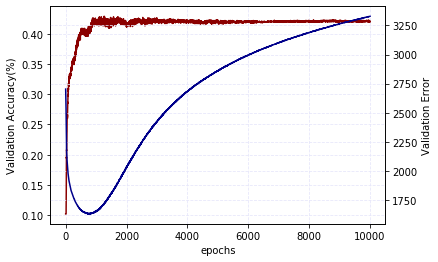

나의 최고 validation accuracy :  0.429


In [14]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))